# **Importing Libraries**

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import base64
import seaborn as sns
import urllib
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [6]:
# #load csv files into dataframes
# train_df=pd.read_csv('customer_churn_dataset-testing-master.csv')
# test_df=pd.read_csv('customer_churn_dataset-training-master.csv')

# # Concatenate the DataFrames
# combained_df=pd.concat([train_df,test_df],ignore_index=0)

# # Save the combined DataFrame to a new CSV file
# combained_df.to_csv('combained_data.csv', index=False)
combained_df=pd.read_csv('merged_customer_churn.csv')
#Displays the first few rows of the dataset
combained_df.head()


,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1.0,22.0,Female,25.0,14.0,4.0,27.0,Basic,Monthly,598.0,9.0,1.0
1,2.0,41.0,Female,28.0,28.0,7.0,13.0,Standard,Monthly,584.0,20.0,0.0
2,3.0,47.0,Male,27.0,10.0,2.0,29.0,Premium,Annual,757.0,21.0,0.0
3,4.0,35.0,Male,9.0,12.0,5.0,17.0,Premium,Quarterly,232.0,18.0,0.0
4,5.0,53.0,Female,58.0,24.0,9.0,2.0,Standard,Annual,533.0,18.0,0.0


In [7]:
#Displays the last few rows
combained_df.tail()


,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
505202,449995.0,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
505203,449996.0,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
505204,449997.0,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
505205,449998.0,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0
505206,449999.0,31.0,Male,48.0,20.0,1.0,14.0,Premium,Quarterly,567.77,21.0,0.0


# **Exploratory Data Analysis**

In [8]:
#Summary of the dataset, including column data types and non-null counts
combained_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505207 entries, 0 to 505206
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         505206 non-null  float64
 1   Age                505206 non-null  float64
 2   Gender             505206 non-null  object 
 3   Tenure             505206 non-null  float64
 4   Usage Frequency    505206 non-null  float64
 5   Support Calls      505206 non-null  float64
 6   Payment Delay      505206 non-null  float64
 7   Subscription Type  505206 non-null  object 
 8   Contract Length    505206 non-null  object 
 9   Total Spend        505206 non-null  float64
 10  Last Interaction   505206 non-null  float64
 11  Churn              505206 non-null  float64
dtypes: float64(9), object(3)
memory usage: 46.3+ MB


In [9]:
# Check for missing values in each column
print(combained_df.isnull().sum())

# Remove rows with any missing values
combained_df.dropna(inplace=True)
print('-----------')
#Checking that nulls are removed
print(combained_df.isnull().sum())

# Check the updated DataFrame
combained_df.shape

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64
-----------
CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64


(505206, 12)

In [10]:
# Convert 'Age' and 'Churn' columns to integer type
combained_df['Age'] = combained_df['Age'].astype(int)
combained_df['Churn'] = combained_df['Churn'].astype(int)

In [11]:
#get the dimensions of a DataFrame
combained_df.shape


(505206, 12)

In [12]:
# from sklearn.impute import SimpleImputer
# numeric_cols = combained_df.select_dtypes(include=['number']).columns
# categorical_cols = combained_df.select_dtypes(include=['object']).columns
# numeric_imputer = SimpleImputer(strategy='mean')
# categorical_imputer = SimpleImputer(strategy='most_frequent')
# combained_df[numeric_cols] = numeric_imputer.fit_transform(combained_df[numeric_cols])
# combained_df[categorical_cols] = categorical_imputer.fit_transform(combained_df[categorical_cols])
# print('-------------------')
# print(combained_df.isnull().sum())

In [13]:
df_cleaned = combained_df.dropna()

In [14]:
#Provides summary statistics for numerical columns
combained_df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000
mean,200779.451782,39.704172,31.350435,15.714825,3.833317,13.496843,620.072766,14.610581,0.555203
std,137241.343095,12.670577,17.237482,8.619323,3.133603,8.451187,245.319256,8.608286,0.496944
min,1.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,63827.250000,29.000000,16.000000,8.000000,1.000000,6.000000,446.000000,7.000000,0.000000
50%,193039.500000,40.000000,32.000000,16.000000,3.000000,13.000000,648.900000,14.000000,1.000000
75%,321645.750000,49.000000,46.000000,23.000000,6.000000,20.000000,824.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [15]:
# Check for duplicate rows
print(combained_df.duplicated().sum())

0


In [16]:
# Columns to check for outliers
data_num= combained_df[['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend']]
q1 = data_num.quantile(0.25)
q3 = data_num.quantile(0.75)
IQR = q3 - q1
outliers = (data_num < (q1 - 1.5 * IQR)) | (data_num > (q3 + 1.5 * IQR))
# print(outliers.sum())
print(outliers)


          Age  Tenure  Usage Frequency  Support Calls  Payment Delay  \
0       False   False            False          False          False   
1       False   False            False          False          False   
2       False   False            False          False          False   
3       False   False            False          False          False   
4       False   False            False          False          False   
...       ...     ...              ...            ...            ...   
505202  False   False            False          False          False   
505203  False   False            False          False          False   
505204  False   False            False          False          False   
505205  False   False            False          False          False   
505206  False   False            False          False          False   

        Total Spend  
0             False  
1             False  
2             False  
3             False  
4             False  
...

In [17]:
#showing the quartiles and more details about data_num
print(data_num.describe())

                 Age         Tenure  Usage Frequency  Support Calls  \
count  505206.000000  505206.000000    505206.000000  505206.000000   
mean       39.704172      31.350435        15.714825       3.833317   
std        12.670577      17.237482         8.619323       3.133603   
min        18.000000       1.000000         1.000000       0.000000   
25%        29.000000      16.000000         8.000000       1.000000   
50%        40.000000      32.000000        16.000000       3.000000   
75%        49.000000      46.000000        23.000000       6.000000   
max        65.000000      60.000000        30.000000      10.000000   

       Payment Delay    Total Spend  
count  505206.000000  505206.000000  
mean       13.496843     620.072766  
std         8.451187     245.319256  
min         0.000000     100.000000  
25%         6.000000     446.000000  
50%        13.000000     648.900000  
75%        20.000000     824.000000  
max        30.000000    1000.000000  


# **Visualization**

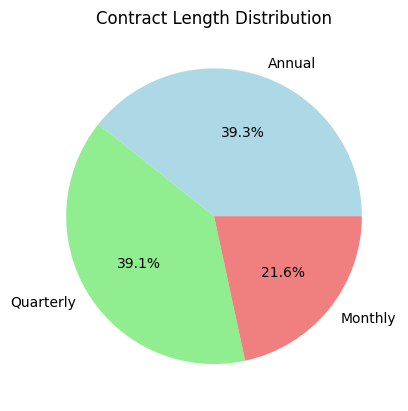

In [18]:
contract_length_counts = combained_df['Contract Length'].value_counts()

# Plotting a pie chart
plt.pie(contract_length_counts, labels=contract_length_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral', 'orange'])
plt.title('Contract Length Distribution')
plt.show()


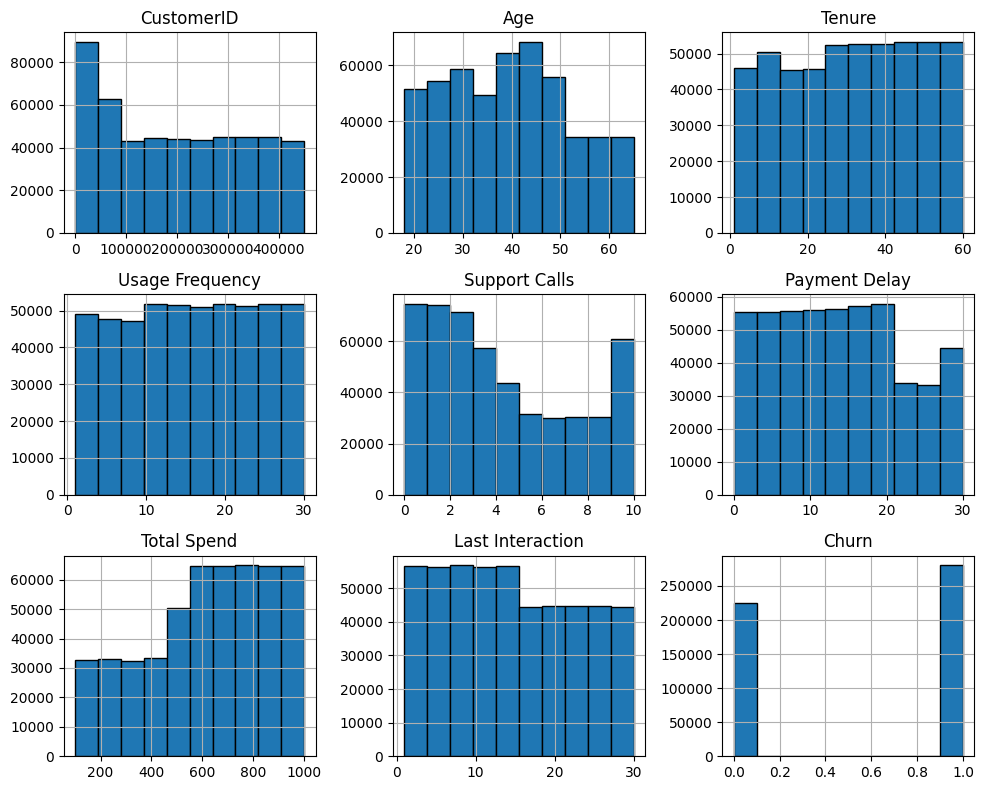

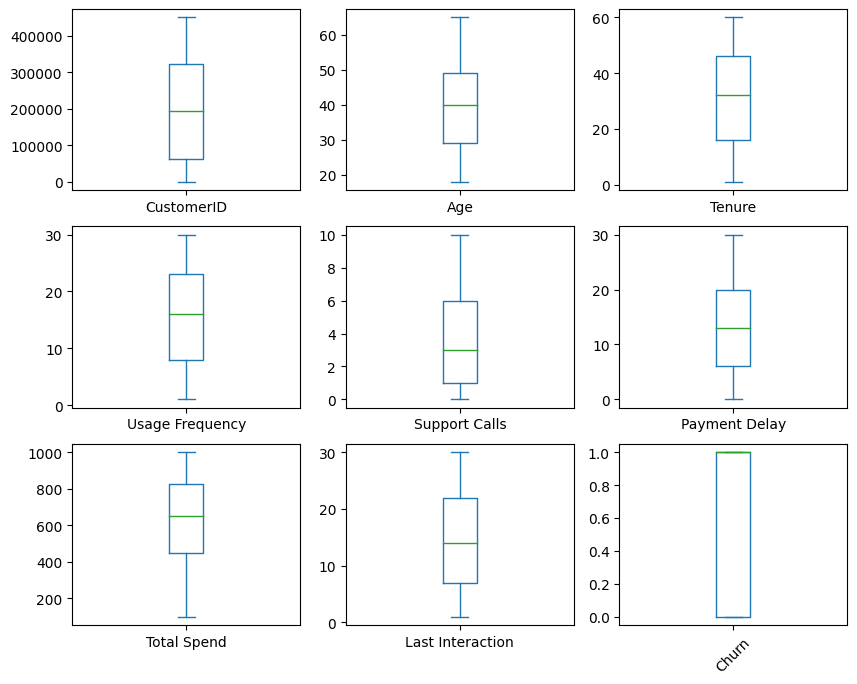

In [19]:
# Data Distribution by Histogram for numerical features
combained_df.hist(figsize=(10, 8),edgecolor='black')
plt.tight_layout()
plt.show()

# Box plot for numerical features
combained_df.plot(kind='box', subplots=True, layout=(3, 3), figsize=(10, 8))
plt.xticks(rotation=45)
plt.show()


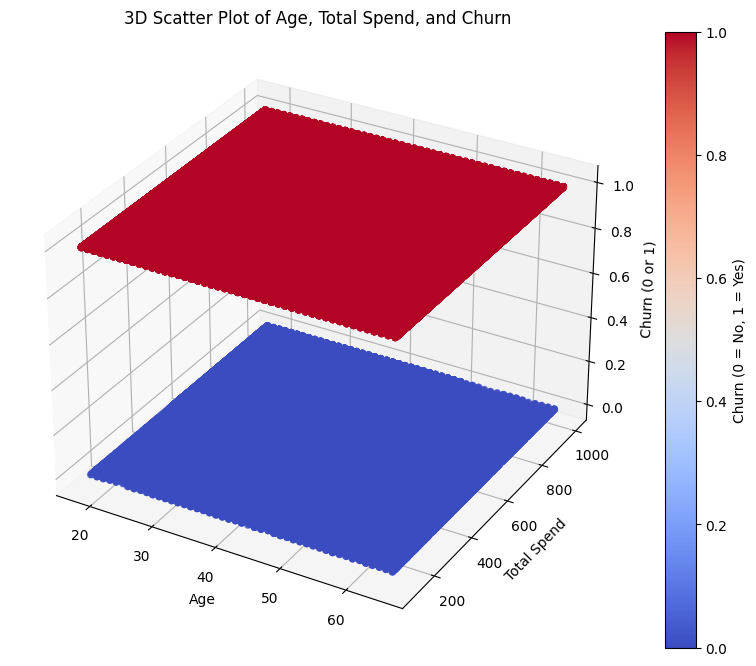

In [20]:
# Create 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

x = combained_df['Age']
y = combained_df['Total Spend']
z = combained_df['Churn']

# Color by churn value
scatter = ax.scatter(x, y, z, c=z, cmap='coolwarm', marker='o')

ax.set_xlabel('Age')
ax.set_ylabel('Total Spend')
ax.set_zlabel('Churn (0 or 1)')
plt.title('3D Scatter Plot of Age, Total Spend, and Churn')

# Add color bar
fig.colorbar(scatter, ax=ax, label='Churn (0 = No, 1 = Yes)')

plt.show()

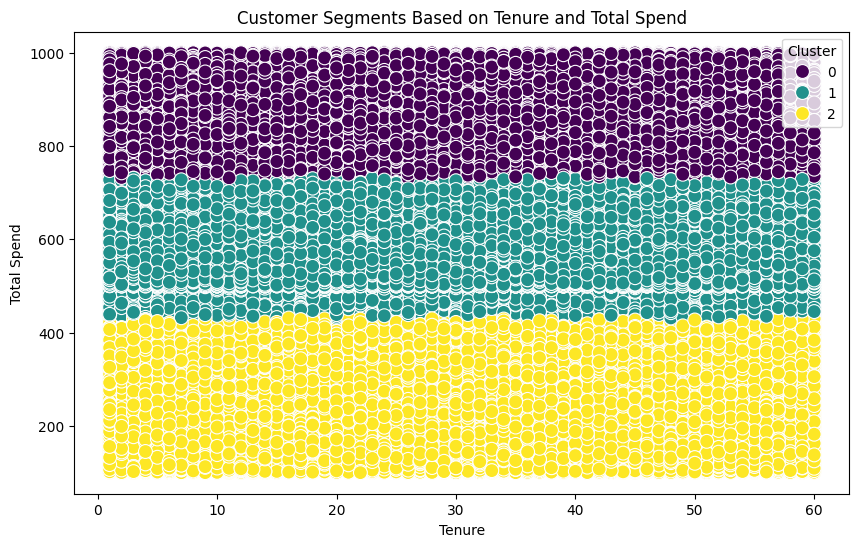

Cluster
0    0.414523
1    0.478419
2    0.901506
Name: Churn, dtype: float64


In [21]:
# Prepare the data for clustering
X = combained_df[['Tenure', 'Total Spend']]

# Apply K-Means clustering (choose the number of clusters, e.g., 3)
kmeans = KMeans(n_clusters=3, random_state=0)
combained_df['Cluster'] = kmeans.fit_predict(X)

# Visualize the clusters using scatter plots
plt.figure(figsize=(10, 6))

# Scatter plot with clusters highlighted
sns.scatterplot(x='Tenure', y='Total Spend', hue='Cluster', data=combained_df, palette='viridis', s=100)

plt.title('Customer Segments Based on Tenure and Total Spend')
plt.xlabel('Tenure')
plt.ylabel('Total Spend')
plt.legend(title='Cluster', loc='upper right')
plt.show()

# Analyze churn behavior by cluster
# Calculate churn rate in each cluster
cluster_churn_rate = combained_df.groupby('Cluster')['Churn'].mean()

# Print churn rate per cluster
print(cluster_churn_rate)


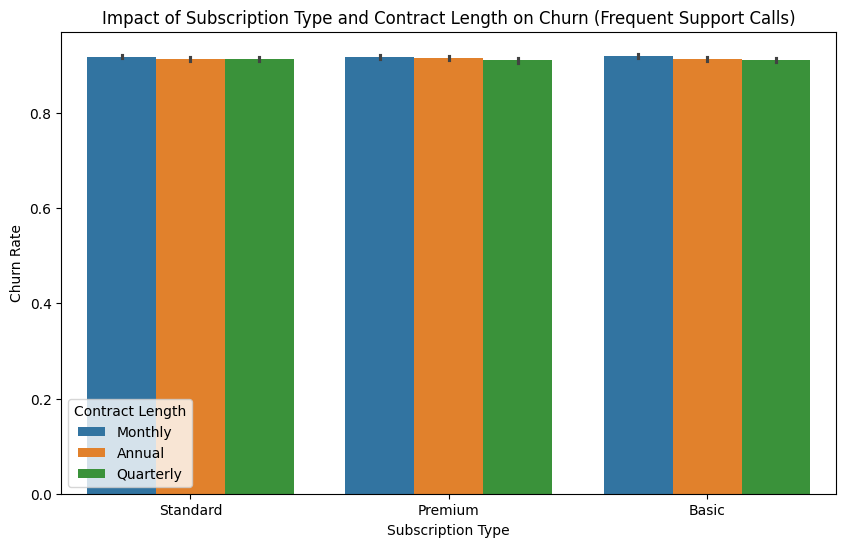

In [22]:
# Define frequent support calls based on a threshold (e.g., more than 5 support calls)
combained_df['Frequent Support Calls'] = combained_df['Support Calls'] > 5
# Create a plot for customers with frequent support calls only
df_frequent_support = combained_df[combained_df['Frequent Support Calls'] == True]

# Set the figure size
plt.figure(figsize=(10,6))

# Create a nested bar plot
sns.barplot(data=df_frequent_support,
            x='Subscription Type',
            y='Churn',
            hue='Contract Length')

# Add labels and title
plt.title("Impact of Subscription Type and Contract Length on Churn (Frequent Support Calls)")
plt.xlabel("Subscription Type")
plt.ylabel("Churn Rate")
plt.legend(title="Contract Length")

# Show the plot
plt.show()


# Mahmoud

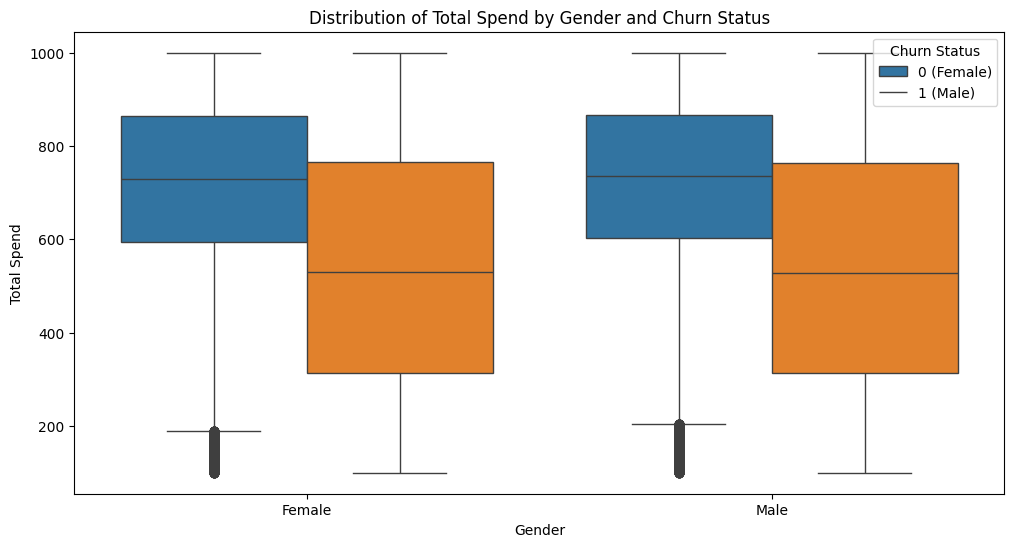

In [23]:
#What is the distribution of total spend by gender and churn status?
plt.figure(figsize=(12, 6))
sns.boxplot(x='Gender', y='Total Spend', hue='Churn', data=combained_df)
plt.title('Distribution of Total Spend by Gender and Churn Status')
plt.xlabel('Gender')
plt.ylabel('Total Spend')
plt.legend(title='Churn Status', labels=['0 (Female)', '1 (Male)'], loc='upper right')
plt.show()

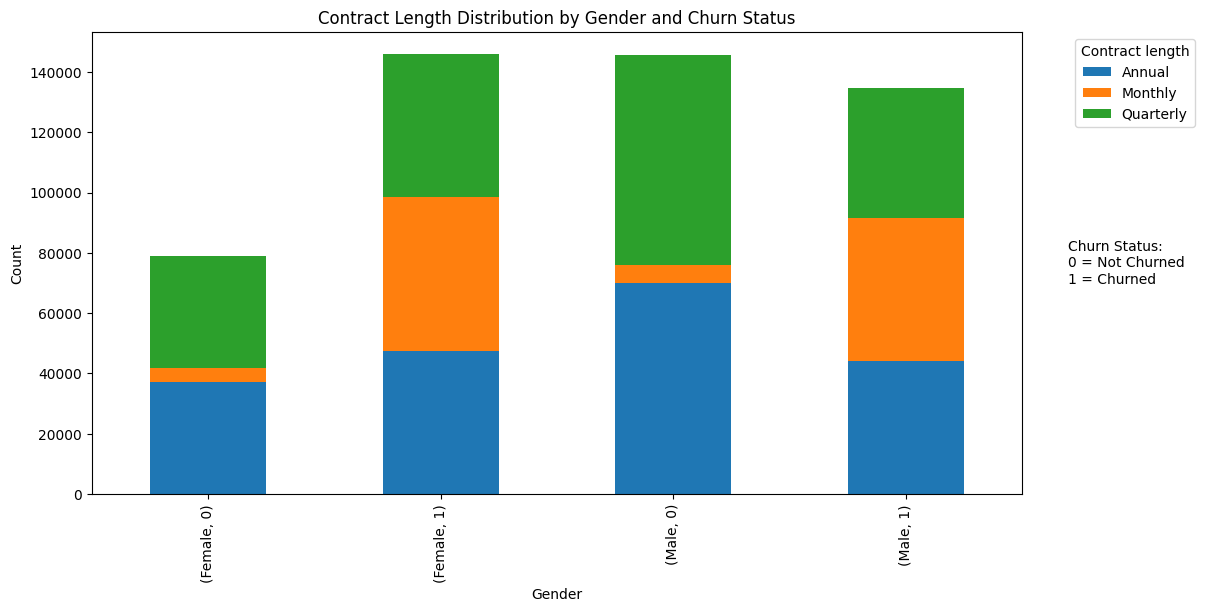

In [24]:
# How does contract length vary by gender and churn status?
contract_length_counts = combained_df.groupby(['Gender', 'Churn'])['Contract Length'].value_counts().unstack(fill_value=0)
contract_length_counts.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title('Contract Length Distribution by Gender and Churn Status')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Contract length', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add an additional custom legend to explain 0 = Not Churned, 1 = Churned
plt.text(1.05, 0.5, 'Churn Status:\n0 = Not Churned\n1 = Churned',
         transform=plt.gca().transAxes, fontsize=10, verticalalignment='center')

plt.show()

Churn
0    10.383025
1    15.991454
Name: Payment Delay, dtype: float64


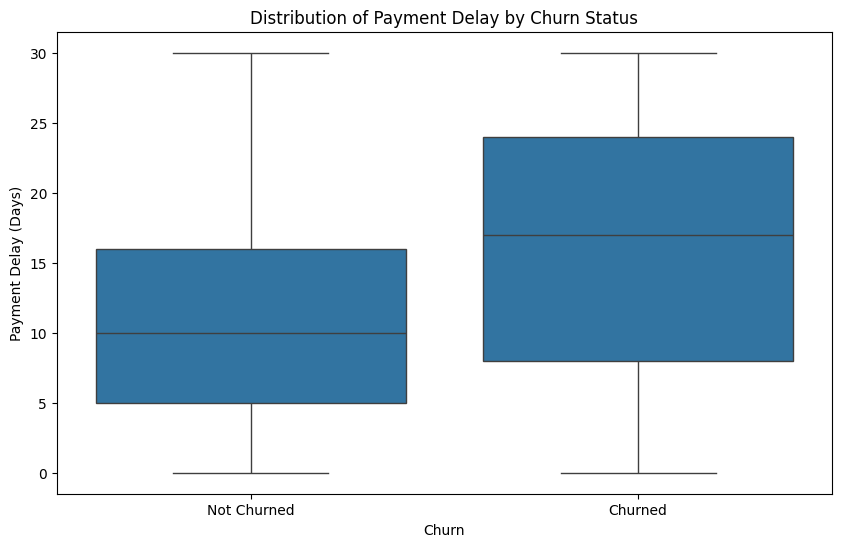

In [25]:
#What is the relationship between payment delay and churn status?
payment_delay_by_churn = combained_df.groupby('Churn')['Payment Delay'].mean()

print(payment_delay_by_churn)

plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='Payment Delay', data=combained_df)
plt.title('Distribution of Payment Delay by Churn Status')
plt.xlabel('Churn')
plt.ylabel('Payment Delay (Days)')
plt.xticks([0, 1], ['Not Churned', 'Churned'])
plt.show()

# **Asmaa**

In [26]:
def make_piechart(df, target_feature, additional=''):
    dict_of_val_counts = dict(df[target_feature].value_counts())
    data = list(dict_of_val_counts.values())
    keys = list(dict_of_val_counts.keys())

    palette_color = sns.color_palette('bright')
    plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')
    plt.title(f"Distribution of Cutomer's {target_feature}:")
    plt.show()
    print_str = f"Distribution of cutomer's {target_feature.lower()}{additional}:"
    for k, v in zip(keys, data):
        print_str += f"\n{v} {k}"
    print(print_str)

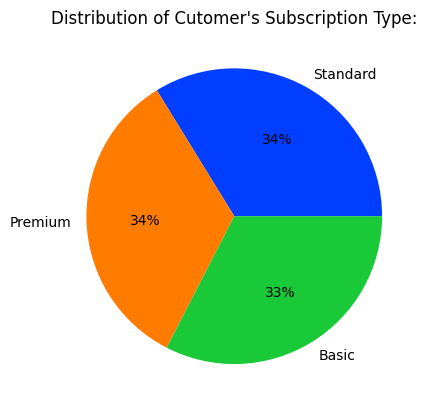

Distribution of cutomer's subscription type:
170630 Standard
170099 Premium
164477 Basic


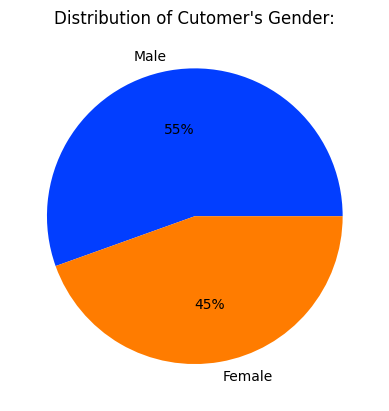

Distribution of cutomer's gender:
280273 Male
224933 Female


In [27]:
make_piechart(combained_df, 'Subscription Type')
make_piechart(combained_df, 'Gender')

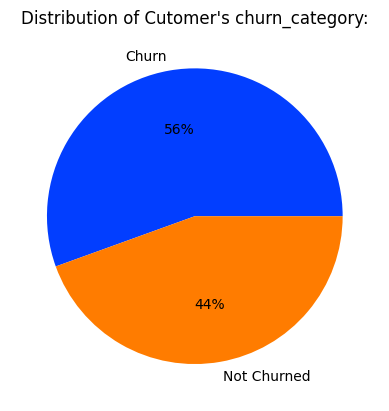

Distribution of cutomer's churn_category:
280492 Churn
224714 Not Churned


In [28]:
# Copying the dataset to a new dataframe
filtered = combained_df.copy()

# Creating a new column for churn category
filtered['churn_category'] = ['Churn' if x == 1 else 'Not Churned' for x in combained_df['Churn']]

# Using the make_piechart function to visualize the churn distribution
make_piechart(filtered, 'churn_category')

Relationship between Tenure and Churn (Scatter Plot and Line Chart)

the scatter plot suggests no strong direct relationship between tenure and churn
showing a trend where the churn rate is initially volatile but becomes more stable over time.

Text(0, 0.5, 'Average Churn Rate')

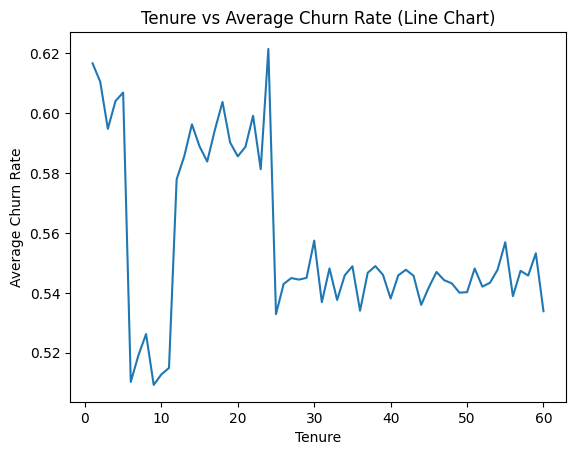

In [29]:
sns.lineplot(data=combained_df, x='Tenure', y='Churn', ci=None)
plt.title('Tenure vs Average Churn Rate (Line Chart)')
plt.xlabel('Tenure')
plt.ylabel('Average Churn Rate')

3. Churn Variation with Age for Different Genders (Line Chart and Stacked Bar Chart)

indicates that age and gender significantly affect churn behavior, with churn rates declining as age increases and being consistently higher for females.

Text(0, 0.5, 'Average Churn Rate')

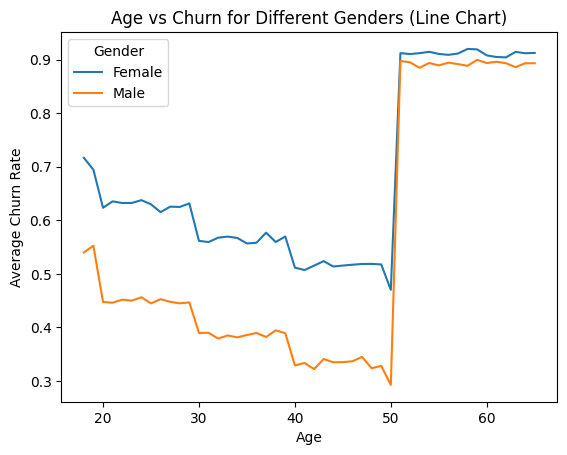

In [30]:
sns.lineplot(data=combained_df, x='Age', y='Churn', hue='Gender', ci=None)
plt.title('Age vs Churn for Different Genders (Line Chart)')
plt.xlabel('Age')
plt.ylabel('Average Churn Rate')

How does the number of support calls vary across different subscription types and churn status? (Heatmap)

Customers who make a higher number of support calls are more likely to churn, indicating that frequent support calls might be a sign of issues or dissatisfaction with the service.

dark blue color required fewer support calls.

dark red color higher number of support calls


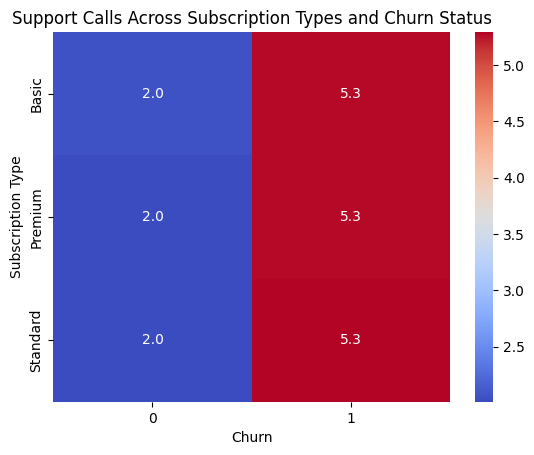

In [31]:
# Create a pivot table for Subscription Type, Churn status, and the average number of Support Calls
heatmap_data = combained_df.pivot_table(index='Subscription Type', columns='Churn', values='Support Calls', aggfunc='mean')

# Plot the heatmap
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap='coolwarm')
plt.title('Support Calls Across Subscription Types and Churn Status')
plt.xlabel('Churn')
plt.ylabel('Subscription Type')

plt.show()

# **Mariam**

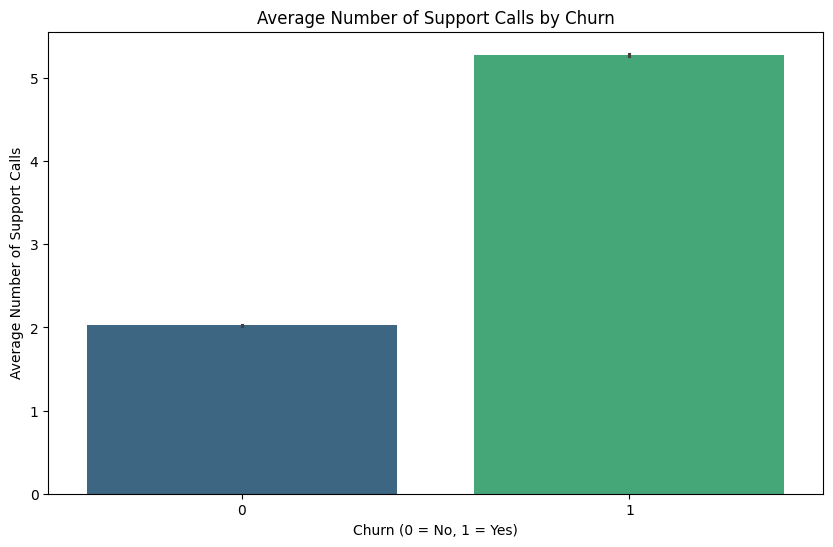

In [32]:
# How does the number of support calls correlate with customer churn?

# Bar chart: Average number of support calls for churned vs non-churned customers
plt.figure(figsize=(10, 6))
sns.barplot(data=combained_df, x='Churn', y='Support Calls', palette='viridis')
plt.title('Average Number of Support Calls by Churn')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Average Number of Support Calls')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


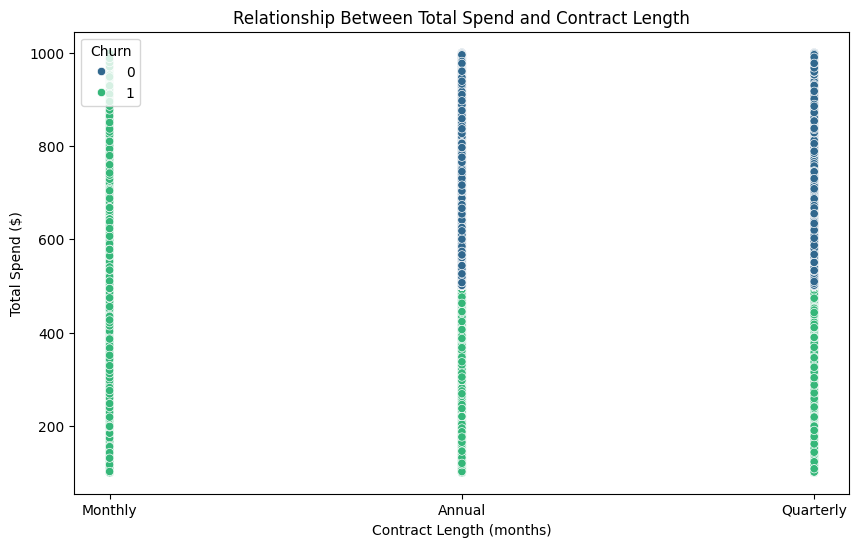

In [33]:
#What is the relationship between total spend and contract length? (Scatter plot)
# Scatter plot: Total Spend vs. Contract Length
plt.figure(figsize=(10, 6))
sns.scatterplot(data=combained_df, x='Contract Length', y='Total Spend', hue='Churn', palette='viridis')
plt.title('Relationship Between Total Spend and Contract Length')
plt.xlabel('Contract Length (months)')
plt.ylabel('Total Spend ($)')
plt.show()

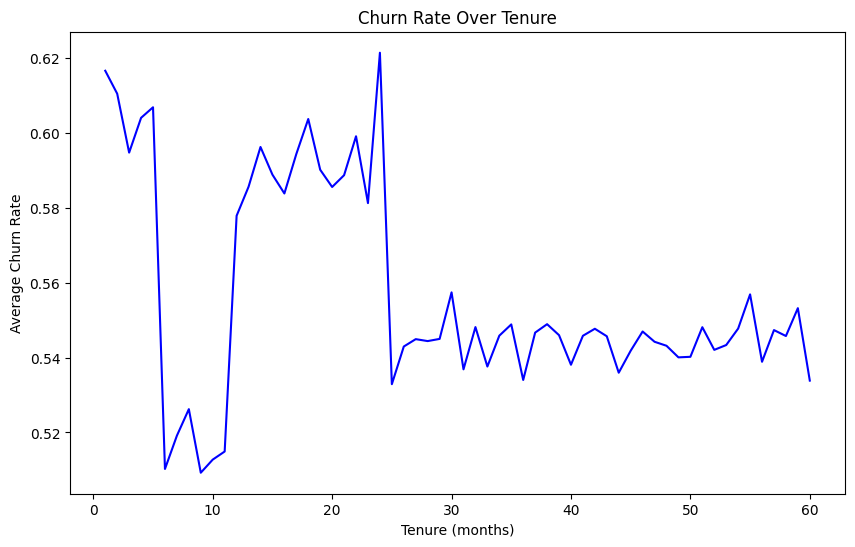

In [34]:
# Is there a trend between tenure and churn over time? (Line chart/Scatter plot)

# Line chart: Average churn rate over tenure periods
avg_churn_by_tenure = combained_df.groupby('Tenure')['Churn'].mean()
plt.figure(figsize=(10, 6))
plt.plot(avg_churn_by_tenure, color='blue')
plt.title('Churn Rate Over Tenure')
plt.xlabel('Tenure (months)')
plt.ylabel('Average Churn Rate')
plt.show()

# **Lobna**

In [35]:
combained_df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,Cluster,Frequent Support Calls
0,1.0,22,Female,25.0,14.0,4.0,27.0,Basic,Monthly,598.0,9.0,1,1,False
1,2.0,41,Female,28.0,28.0,7.0,13.0,Standard,Monthly,584.0,20.0,0,1,True
2,3.0,47,Male,27.0,10.0,2.0,29.0,Premium,Annual,757.0,21.0,0,0,False
3,4.0,35,Male,9.0,12.0,5.0,17.0,Premium,Quarterly,232.0,18.0,0,2,False
4,5.0,53,Female,58.0,24.0,9.0,2.0,Standard,Annual,533.0,18.0,0,1,True


In [36]:
#getting correlation of the numerical cols
cols_num = combained_df.select_dtypes(include=['float64', 'int64'])
cols_num.corr()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
CustomerID,1.000000,-0.178442,0.031444,0.043649,-0.476560,-0.282815,0.347573,-0.121668,-0.650617
Age,-0.178442,1.000000,-0.010078,-0.013551,0.146790,0.060569,-0.078679,0.027472,0.191224
Tenure,0.031444,-0.010078,1.000000,-0.020686,-0.013381,-0.004400,0.015810,-0.004726,-0.021308
Usage Frequency,0.043649,-0.013551,-0.020686,1.000000,-0.025947,-0.012667,0.019573,-0.006358,-0.053263
Support Calls,-0.476560,0.146790,-0.013381,-0.025947,1.000000,0.176038,-0.206566,0.074070,0.516283
Payment Delay,-0.282815,0.060569,-0.004400,-0.012667,0.176038,1.000000,-0.125975,0.041767,0.329785
Total Spend,0.347573,-0.078679,0.015810,0.019573,-0.206566,-0.125975,1.000000,-0.054560,-0.369682
Last Interaction,-0.121668,0.027472,-0.004726,-0.006358,0.074070,0.041767,-0.054560,1.000000,0.127150
Churn,-0.650617,0.191224,-0.021308,-0.053263,0.516283,0.329785,-0.369682,0.127150,1.000000


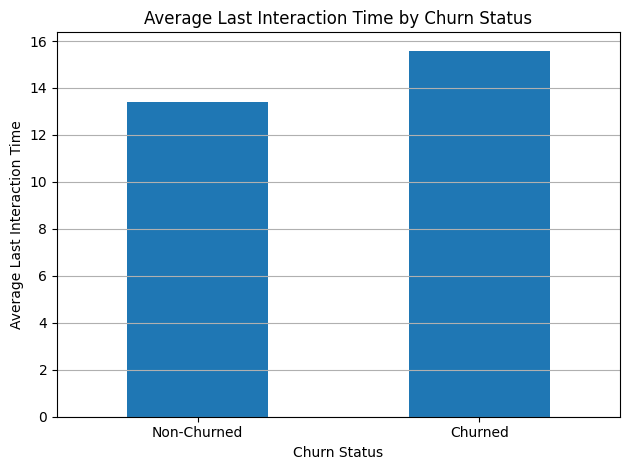

In [37]:
#calculating average interaction based on churn
avg_last_interaction = combained_df.groupby('Churn')['Last Interaction'].mean()


avg_last_interaction.plot(kind='bar')
plt.title('Average Last Interaction Time by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Average Last Interaction Time')
plt.xticks(ticks=[0, 1], labels=['Non-Churned', 'Churned'], rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


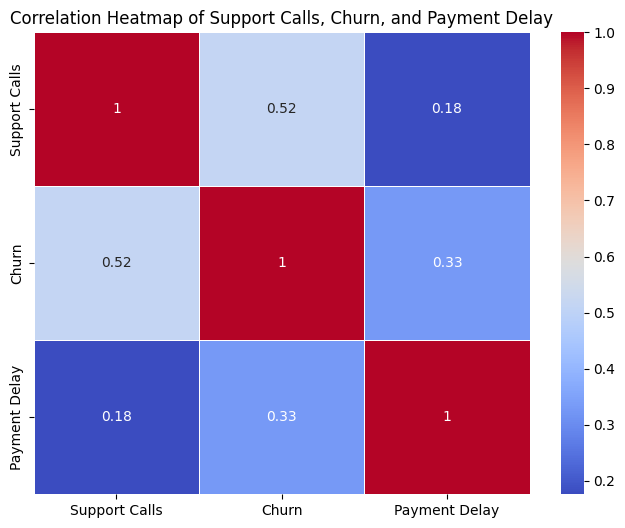

In [38]:
#understanding the relationship between cols by getting the correlation
columns = ['Support Calls', 'Churn', 'Payment Delay']
corr_matrix = combained_df[columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Support Calls, Churn, and Payment Delay')
plt.show()

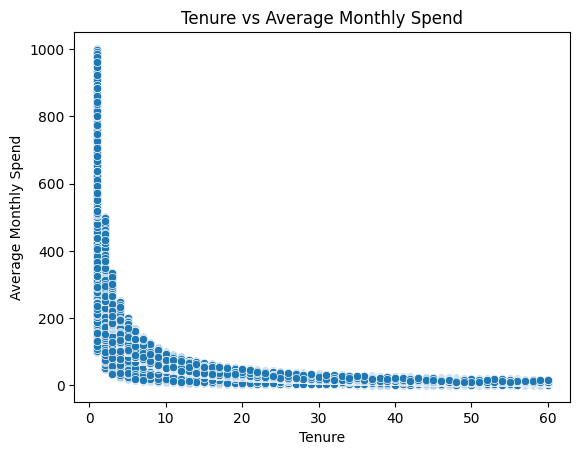

In [39]:
#from this visualize we understand that the increasing of customer tenure , the average monthly spend decreases
combained_df['Average Monthly Spend'] = combained_df['Total Spend'] / combained_df['Tenure']
sns.scatterplot(x='Tenure', y='Average Monthly Spend', data=combained_df.reset_index())
plt.title('Tenure vs Average Monthly Spend')
plt.show()
combained_df.drop('Average Monthly Spend',axis=1,inplace=True)

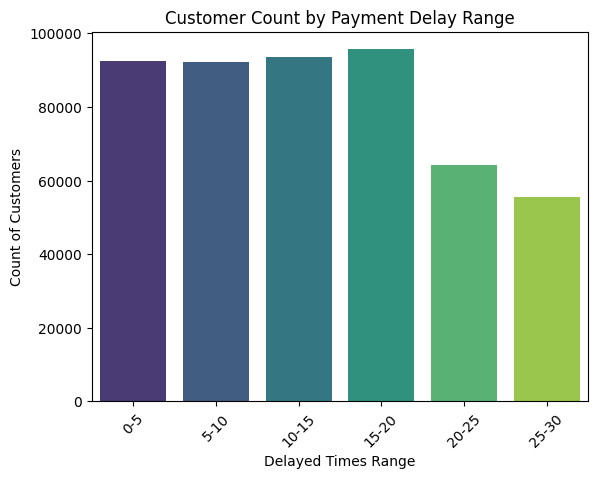

In [40]:
#Visualizing the No. of customer with how many times they delayed their payments
bins = [0, 5, 10,15,20,25,30]
labels = ['0-5', '5-10', '10-15','15-20','20-25','25-30']

combained_df['Payment Delay Range'] = pd.cut(combained_df['Payment Delay'], bins=bins, labels=labels, right=False)
sns.countplot(x='Payment Delay Range', data=combained_df.reset_index(), palette='viridis')

plt.title('Customer Count by Payment Delay Range')
plt.xlabel('Delayed Times Range')
plt.ylabel('Count of Customers')
plt.xticks(rotation=45)
plt.show()


combained_df.drop('Payment Delay Range',axis=1,inplace=True)

# **Deployment**

In [65]:
streamlit_code = """


import streamlit as st
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

# Load dataset
file_path = 'merged_customer_churn.csv'  # Path to your uploaded dataset
combained_df = pd.read_csv(file_path)

# Function to add background image
def add_bg_from_url():
    st.markdown(
        f/"/"/"
        <style>
        .stApp {{
            background-image: url("https://i.pinimg.com/originals/c5/92/cd/c592cd7e5df0bfaa574011387f6e84e4.jpg");
            background-size: cover;
            background-position: center;
            background-attachment: fixed;
        }}
        .title {{
            color: black;
            font-size: 2.5em;
        }}
        .subheader {{
            color: black;
            font-size: 1.5em;
        }}
        </style>
        /"/"/",
        unsafe_allow_html=True
    )
# Apply background image
add_bg_from_url()

# Display dataset on page load
st.markdown('<p class="title">Customer Churn Dashboard</p>', unsafe_allow_html=True)

# Sidebar
st.sidebar.title("Choose Visualization")
options = st.sidebar.selectbox("Select a visualization", [
    "None",  # Default option
    "Contract Length Distribution (Pie Chart)",
    "Data Distribution (Histogram)",
    "3D Scatter Plot (Age, Total Spend, and Churn)",
    "K-Means Clustering (Tenure vs Total Spend)",
    "Subscription Type & Contract Length (Bar Plot)",
    "Total Spend by Gender & Churn (Box Plot)",
    "Contract Length by Gender & Churn (Bar Plot)",
    "Payment Delay by Churn Status (Box Plot)",
    "Subscription Type Pie Chart",
    "Churn Category Pie Chart",
    "Churn Distribution (Pie Chart)",
    "Tenure vs Churn Rate (Line Chart)",
    "Age vs Churn (Line Chart)",
    "Support Calls by Subscription Type and Churn Status",
    "Average Support Calls by Churn Status",
    "Total Spend vs. Contract Length (Scatter Plot)",
    "Churn Over Tenure (Line Chart)",
    "Average Last Interaction by Churn Status",
    "Correlation Heatmap (Support Calls, Churn, Payment Delay)",
    "Payment Delay Range (Customer Count)"
],
index=0
)

# Visualizations based on sidebar selection
if options == "None":
    st.markdown('<p class="subheader">Please select a visualization from the dropdown menu</p>', unsafe_allow_html=True)
elif options == "Contract Length Distribution (Pie Chart)":
    contract_length_counts = combained_df['Contract Length'].value_counts()
    fig, ax = plt.subplots()
    ax.pie(contract_length_counts, labels=contract_length_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral', 'orange'])
    ax.set_title('Contract Length Distribution')
    st.pyplot(fig)

elif options == "Data Distribution (Histogram)":
    fig, ax = plt.subplots(figsize=(10, 8))
    combained_df.hist(ax=ax, edgecolor='black')
    plt.tight_layout()
    st.pyplot(fig)

elif options == "3D Scatter Plot (Age, Total Spend, and Churn)":
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    x = combained_df['Age']
    y = combained_df['Total Spend']
    z = combained_df['Churn']
    scatter = ax.scatter(x, y, z, c=z, cmap='coolwarm', marker='o')
    ax.set_xlabel('Age')
    ax.set_ylabel('Total Spend')
    ax.set_zlabel('Churn (0 or 1)')
    plt.title('3D Scatter Plot of Age, Total Spend, and Churn')
    fig.colorbar(scatter, ax=ax, label='Churn (0 = No, 1 = Yes)')
    st.pyplot(fig)

elif options == "K-Means Clustering (Tenure vs Total Spend)":
    # Handle missing values by dropping rows with NaNs
    X = combained_df[['Tenure', 'Total Spend']].dropna()
    kmeans = KMeans(n_clusters=3, random_state=0)
    combained_df.loc[X.index, 'Cluster'] = kmeans.fit_predict(X)

    fig, ax = plt.subplots()
    sns.scatterplot(x='Tenure', y='Total Spend', hue='Cluster', data=combained_df, palette='viridis', s=100, ax=ax)
    ax.set_title('Customer Segments Based on Tenure and Total Spend')
    st.pyplot(fig)

elif options == "Subscription Type & Contract Length (Bar Plot)":
    fig, ax = plt.subplots()
    sns.countplot(x='Subscription Type', hue='Contract Length', data=combained_df, palette='Set2', ax=ax)
    ax.set_title('Subscription Type & Contract Length')
    st.pyplot(fig)

elif options == "Total Spend by Gender & Churn (Box Plot)":
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.boxplot(x='Gender', y='Total Spend', hue='Churn', data=combained_df, ax=ax)
    ax.set_title('Distribution of Total Spend by Gender and Churn Status')
    ax.set_xlabel('Gender')
    ax.set_ylabel('Total Spend')
    ax.legend(title='Churn Status', labels=['0 (Not Churned)', '1 (Churned)'], loc='upper right')
    st.pyplot(fig)

elif options == "Contract Length by Gender & Churn (Bar Plot)":
    contract_length_counts = combained_df.groupby(['Gender', 'Churn'])['Contract Length'].value_counts().unstack(fill_value=0)
    fig, ax = plt.subplots(figsize=(12, 6))
    contract_length_counts.plot(kind='bar', stacked=True, ax=ax)
    ax.set_title('Contract Length Distribution by Gender and Churn Status')
    ax.set_xlabel('Gender')
    ax.set_ylabel('Count')
    ax.legend(title='Contract Length', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.text(1.05, 0.5, 'Churn Status: 0 = Not Churned 1 = Churned',
             transform=plt.gca().transAxes, fontsize=10, verticalalignment='center')
    st.pyplot(fig)

elif options == "Payment Delay by Churn Status (Box Plot)":
    payment_delay_by_churn = combained_df.groupby('Churn')['Payment Delay'].mean()
    st.write(payment_delay_by_churn)  # Display the mean payment delay
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.boxplot(x='Churn', y='Payment Delay', data=combained_df, ax=ax)
    ax.set_title('Distribution of Payment Delay by Churn Status')
    ax.set_xlabel('Churn')
    ax.set_ylabel('Payment Delay (Days)')
    ax.set_xticklabels(['Not Churned', 'Churned'])
    st.pyplot(fig)


elif options == "Subscription Type Pie Chart":
    subscription_type_counts = combained_df['Subscription Type'].value_counts()
    fig, ax = plt.subplots()
    ax.pie(subscription_type_counts, labels=subscription_type_counts.index, autopct='%1.1f%%')
    ax.set_title('Subscription Type Distribution')
    st.pyplot(fig)

elif options == "Churn Category Pie Chart":
    churn_category_counts = combained_df['Churn'].value_counts()
    fig, ax = plt.subplots()
    ax.pie(churn_category_counts, labels=churn_category_counts.index, autopct='%1.1f%%')
    ax.set_title('Churn Category Distribution')
    st.pyplot(fig)

elif options == "Churn Distribution (Pie Chart)":
    filtered = combained_df.copy()
    filtered['churn_category'] = ['Churn' if x == 1 else 'Not Churned' for x in filtered['Churn']]
    dict_of_val_counts = dict(filtered['churn_category'].value_counts())
    data = list(dict_of_val_counts.values())
    keys = list(dict_of_val_counts.keys())
    palette_color = sns.color_palette('bright')
    plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')
    plt.title("Distribution of Customer's Churn Status:")
    plt.axis('equal')  # Ensures the pie chart is circular
    st.pyplot(plt)  # This line will render the plot in Streamlit

elif options == "Tenure vs Churn Rate (Line Chart)":
    fig, ax = plt.subplots()
    sns.lineplot(x='Tenure', y='Churn', data=combained_df, ax=ax)
    ax.set_title('Tenure vs Churn Rate')
    st.pyplot(fig)

elif options == "Age vs Churn (Line Chart)":
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.lineplot(data=combained_df, x='Age', y='Churn', hue='Gender', ci=None, ax=ax)
    ax.set_title('Age vs Churn for Different Genders (Line Chart)')
    ax.set_xlabel('Age')
    ax.set_ylabel('Average Churn Rate')
    st.pyplot(fig)

elif options == "Support Calls by Subscription Type and Churn Status":
    # Create a pivot table for Subscription Type, Churn status, and the average number of Support Calls
    heatmap_data = combained_df.pivot_table(index='Subscription Type', columns='Churn', values='Support Calls', aggfunc='mean')
    plt.figure(figsize=(10, 6))
    sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap='coolwarm')
    plt.title('Support Calls Across Subscription Types and Churn Status')
    plt.xlabel('Churn Status')
    plt.ylabel('Subscription Type')
    plt.tight_layout()
    st.pyplot(plt)

elif options == "Average Support Calls by Churn Status":
    plt.figure(figsize=(10, 6))
    sns.barplot(data=combained_df, x='Churn', y='Support Calls', palette='viridis')
    plt.title('Average Number of Support Calls by Churn Status')
    plt.xlabel('Churn (0 = Not Churned, 1 = Churned)')
    plt.ylabel('Average Number of Support Calls')
    plt.tight_layout()

    st.pyplot(plt)

elif options == "Total Spend vs. Contract Length (Scatter Plot)":
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.scatterplot(data=combained_df, x='Contract Length', y='Total Spend', hue='Churn', palette='viridis', ax=ax)
    ax.set_title('Relationship Between Total Spend and Contract Length')
    ax.set_xlabel('Contract Length (months)')
    ax.set_ylabel('Total Spend ($)')
    st.pyplot(fig)

elif options == "Churn Over Tenure (Line Chart)":
    fig, ax = plt.subplots()
    sns.lineplot(x='Tenure', y='Churn', data=combained_df, ax=ax)
    ax.set_title('Churn Over Tenure')
    st.pyplot(fig)

elif options == "Average Last Interaction by Churn Status":
    # Calculating the average of the 'Last Interaction' by 'Churn' status
    avg_last_interaction = combained_df.groupby('Churn')['Last Interaction'].mean()
    avg_last_interaction.plot(kind='bar')
    plt.title('Average Last Interaction Time by Churn Status')
    plt.xlabel('Churn Status')
    plt.ylabel('Average Last Interaction Time')
    plt.xticks(ticks=[0, 1], labels=['Non-Churned', 'Churned'], rotation=0)
    plt.grid(axis='y')
    plt.tight_layout()
    st.pyplot(plt)

elif options == "Correlation Heatmap (Support Calls, Churn, Payment Delay)":
    fig, ax = plt.subplots()
    sns.heatmap(combained_df[['Support Calls', 'Churn', 'Payment Delay']].corr(), annot=True, cmap='coolwarm', ax=ax)
    ax.set_title('Correlation Heatmap')
    st.pyplot(fig)

elif options == "Payment Delay Range (Customer Count)":
    bins = [0, 5, 10, 15, 20, 25, 30]
    labels = ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30']
    combained_df['Payment Delay Range'] = pd.cut(combained_df['Payment Delay'], bins=bins, labels=labels, right=False)
    sns.countplot(x='Payment Delay Range', data=combained_df.reset_index(), palette='viridis')
    plt.title('Customer Count by Payment Delay Range')
    plt.xlabel('Delayed Times Range')
    plt.ylabel('Count of Customers')
    plt.xticks(rotation=45)
    plt.tight_layout()
    st.pyplot(plt)
    combained_df.drop('Payment Delay Range', axis=1, inplace=True)

# Button to show dataset description
if st.sidebar.button('Show Dataset Description'):
    st.subheader('Dataset Description')
    st.write(combained_df.describe())

# Option to show the dataset
if st.sidebar.checkbox('Show Dataset',value=True):
    st.subheader('Dataset')
    st.write(combained_df)


# from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import HistGradientBoostingClassifier

# Load dataset
file_path = 'merged_customer_churn.csv'  # Path to your uploaded dataset
combained_df = pd.read_csv(file_path)
combained_df = combained_df.dropna()

# Preprocessing for prediction (simple example)
# Encoding Subscription Type manually (Basic=0, Standard=1, Premium=2)
subscription_type_mapping = {'Basic': 0, 'Standard': 1, 'Premium': 2}

# Encoding Contract Length manually (Annually=12, Quarterly=3, Monthly=1)
contract_length_mapping = {'Annually': 12, 'Quarterly': 3, 'Monthly': 1}

# Features and target
X = combained_df[['Usage Frequency', 'Support Calls', 'Payment Delay',
                  'Subscription Type', 'Contract Length', 'Total Spend', 'Last Interaction']]

# Encode Subscription Type and Contract Length for model training
X['Subscription Type'] = X['Subscription Type'].map(subscription_type_mapping)
X['Contract Length'] = X['Contract Length'].map(contract_length_mapping)
y = combained_df['Churn']

label_encoder = LabelEncoder()
combained_df['Subscription Type'] = label_encoder.fit_transform(combained_df['Subscription Type'])

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Gradient Boosting Classifier model
model = HistGradientBoostingClassifier()

# Fit the model
model.fit(X, y)

# Sidebar - Prediction option
st.sidebar.title("Predict Churn")

# Show input fields for user
st.sidebar.subheader("Input Customer Data:")
usage_frequency = st.sidebar.number_input('Usage Frequency', min_value=0, max_value=100, value=10)
support_calls = st.sidebar.number_input('Support Calls', min_value=0, max_value=100, value=5)
payment_delay = st.sidebar.number_input('Payment Delay (days)', min_value=0, max_value=365, value=0)

# Dropdown for Subscription Type
subscription_type = st.sidebar.selectbox("Subscription Type", ['Basic', 'Standard', 'Premium'])

# Dropdown for Contract Length
contract_length = st.sidebar.selectbox("Contract Length", ['Annually', 'Quarterly', 'Monthly'])

total_spend = st.sidebar.number_input('Total Spend ($)', min_value=0.0, value=1000.0)
last_interaction = st.sidebar.number_input('Last Interaction (days ago)', min_value=0, max_value=365, value=30)

if st.sidebar.button('Predict Churn'):

    # Map the user input for Subscription Type and Contract Length
    subscription_type_encoded = subscription_type_mapping[subscription_type]
    contract_length_encoded = contract_length_mapping[contract_length]

    # Collect input data into an array
    input_data = np.array([[usage_frequency, support_calls, payment_delay,
                            subscription_type_encoded, contract_length_encoded,
                            total_spend, last_interaction]])

    prediction = model.predict(input_data)

    # Display prediction result
    if prediction[0] == 1:
        st.sidebar.success('The customer is likely to **churn**.')
    else:
        st.sidebar.success('The customer is likely to **stay**.')

"""

with open('Customer_Churn_Streamlit.py', 'w') as f:
    f.write(streamlit_code)

print("Streamlit code saved to 'app.py'")

Streamlit code saved to 'app.py'


In [42]:
#install streamlit
!pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 45.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 67.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.2 MB/s eta 0:00:00


In [43]:
#install local tunnel
!npm install localtunnel


added 22 packages, and audited 23 packages in 3s

3 packages are looking for funding
  run `npm fund` for details

2 moderate severity vulnerabilities

To address all issues, run:
  npm audit fix

Run `npm audit` for details.


In [44]:
#IP of localtunnel
print("Password/Enpoint IP for localtunnel is:",urllib.request.urlopen('https://ipv4.icanhazip.com').read().decode('utf8').strip("\n"))

Password/Enpoint IP for localtunnel is: 35.237.245.56


In [64]:
!streamlit run app.py &>/content/logs.txt & npx localtunnel --port 8501 & curl ipv4.icanhazip.com

35.237.245.56
your url is: https://cold-dryers-remain.loca.lt


# **Machine** **Learning**

In [46]:
combained_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 505206 entries, 0 to 505206
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   CustomerID              505206 non-null  float64
 1   Age                     505206 non-null  int64  
 2   Gender                  505206 non-null  object 
 3   Tenure                  505206 non-null  float64
 4   Usage Frequency         505206 non-null  float64
 5   Support Calls           505206 non-null  float64
 6   Payment Delay           505206 non-null  float64
 7   Subscription Type       505206 non-null  object 
 8   Contract Length         505206 non-null  object 
 9   Total Spend             505206 non-null  float64
 10  Last Interaction        505206 non-null  float64
 11  Churn                   505206 non-null  int64  
 12  Cluster                 505206 non-null  int32  
 13  Frequent Support Calls  505206 non-null  bool   
dtypes: bool(1), float64(7), i

In [47]:
combained_df.head(10)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,Cluster,Frequent Support Calls
0,1.0,22,Female,25.0,14.0,4.0,27.0,Basic,Monthly,598.0,9.0,1,1,False
1,2.0,41,Female,28.0,28.0,7.0,13.0,Standard,Monthly,584.0,20.0,0,1,True
2,3.0,47,Male,27.0,10.0,2.0,29.0,Premium,Annual,757.0,21.0,0,0,False
3,4.0,35,Male,9.0,12.0,5.0,17.0,Premium,Quarterly,232.0,18.0,0,2,False
4,5.0,53,Female,58.0,24.0,9.0,2.0,Standard,Annual,533.0,18.0,0,1,True
5,6.0,30,Male,41.0,14.0,10.0,10.0,Premium,Monthly,500.0,29.0,0,1,True
6,7.0,47,Female,37.0,15.0,9.0,28.0,Basic,Quarterly,574.0,14.0,1,1,True
7,8.0,54,Female,36.0,11.0,0.0,18.0,Standard,Monthly,323.0,16.0,0,2,False
8,9.0,36,Male,20.0,5.0,10.0,8.0,Basic,Monthly,687.0,8.0,0,1,True
9,10.0,65,Male,8.0,4.0,2.0,23.0,Basic,Annual,995.0,10.0,0,0,False


In [48]:
from sklearn.preprocessing import LabelEncoder
combained_df['Gender'] = LabelEncoder().fit_transform(combained_df['Gender'])
combained_df['Subscription Type'] = LabelEncoder().fit_transform(combained_df['Subscription Type'])
combained_df['Contract Length'] = LabelEncoder().fit_transform(combained_df['Contract Length'])
combained_df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,Cluster,Frequent Support Calls
0,1.0,22,0,25.0,14.0,4.0,27.0,0,1,598.0,9.0,1,1,False
1,2.0,41,0,28.0,28.0,7.0,13.0,2,1,584.0,20.0,0,1,True
2,3.0,47,1,27.0,10.0,2.0,29.0,1,0,757.0,21.0,0,0,False
3,4.0,35,1,9.0,12.0,5.0,17.0,1,2,232.0,18.0,0,2,False
4,5.0,53,0,58.0,24.0,9.0,2.0,2,0,533.0,18.0,0,1,True


In [49]:
# Feature Selection
#selecting best features for the target using f_classif method
from sklearn.feature_selection import SelectKBest, f_classif
X = combained_df.drop('Churn',axis =1)
y = combained_df['Churn']
selector = SelectKBest(score_func=f_classif, k='all')
X_new = selector.fit_transform(X, y)

# Get feature scores
scores = selector.scores_
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': scores})
feature_scores = feature_scores.sort_values(by='Score', ascending=False)

# Print the feature scores
print(feature_scores)


                   Feature          Score
0               CustomerID  370825.877800
5            Support Calls  183599.530044
12  Frequent Support Calls  146290.494928
9              Total Spend   79972.870526
11                 Cluster   72663.913532
6            Payment Delay   61649.955652
1                      Age   19174.768633
2                   Gender   14851.430670
10        Last Interaction    8301.886679
4          Usage Frequency    1437.316654
3                   Tenure     229.479680
7        Subscription Type     122.958367
8          Contract Length       1.841310


In [51]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

# Impute missing values in your feature dataset X
imputer = SimpleImputer(strategy='mean')  # or 'median' depending on the data
X_imputed = imputer.fit_transform(X)

# If y has no missing values
y_imputed = y  # Use this if y doesn't need imputation

# Or, if y needs imputation
# imputer_y = SimpleImputer(strategy='most_frequent')  # Use 'most_frequent' for categorical, or another strategy
# y_imputed = imputer_y.fit_transform(y.reshape(-1, 1)).ravel()

# Select the top features based on scores
top_features = feature_scores['Feature'].head(4).values  # Adjust the number as needed

# Get the indices of the top features in your dataset
top_feature_indices = [list(feature_scores['Feature']).index(feature) for feature in top_features]
X_top_imputed = X_imputed[:, top_feature_indices]  # Select only the columns corresponding to top features

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_top_imputed, y_imputed, test_size=0.2, random_state=42)

# Initialize and train the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, random_state=42)
gb_classifier.fit(X_train, y_train)


GradientBoostingClassifier(n_estimators=200, random_state=42)

Accuracy: 0.9255656063815048

Confusion Matrix:
 [[38375  6711]
 [  810 55146]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.85      0.91     45086
           1       0.89      0.99      0.94     55956

    accuracy                           0.93    101042
   macro avg       0.94      0.92      0.92    101042
weighted avg       0.93      0.93      0.92    101042

ROC AUC Score: 0.98


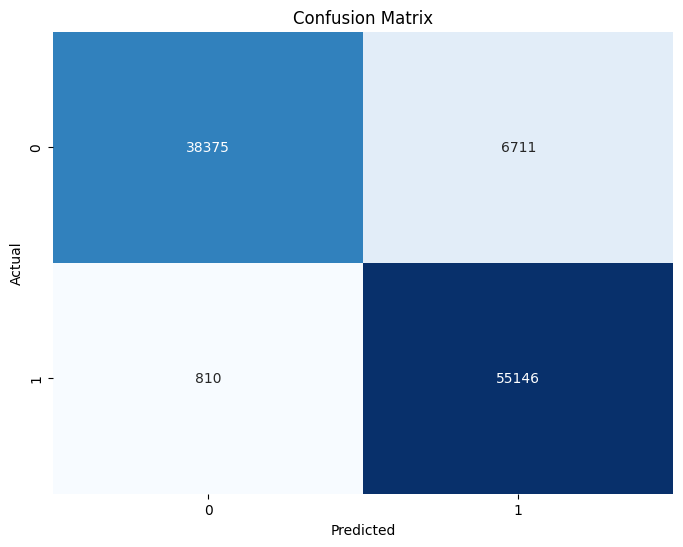

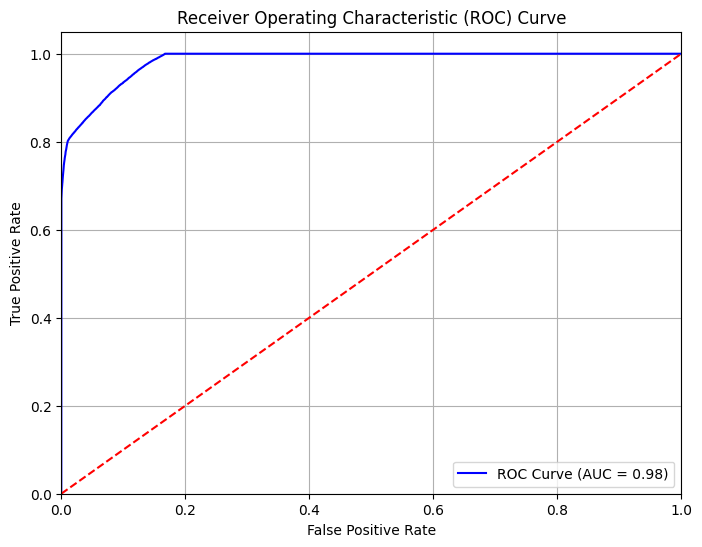

In [52]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
# Make predictions on the test set
y_pred = gb_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print results
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
print("\nClassification Report:\n", class_report)
# Calculate and print the ROC AUC Score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# For ROC AUC, we need the predicted probabilities
y_pred_proba = gb_classifier.predict_proba(X_test)[:, 1]  # Get the probabilities for the positive class
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc:.2f}")

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [53]:
import lightgbm as lgb
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

# Assuming combained_df is your DataFrame
# Step 1: Define features and target variable
X = combained_df.drop('Churn', axis=1)
y = combained_df['Churn']

# Step 2: Drop NaN values from both features and target
X = X[y.notna()]
y = y.dropna()  # Drop NaN values from the target

# Step 3: Impute missing values in the features
imputer = SimpleImputer(strategy='mean')  # You can change the strategy if needed
X_imputed = imputer.fit_transform(X)

# Step 4: Split the cleaned dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Step 5: Use a decision stump as the weak learner
base_learner = DecisionTreeClassifier(max_depth=1)

# Create the AdaBoost classifier with 50 estimators
ada_model = AdaBoostClassifier(estimator=base_learner, n_estimators=50, learning_rate=1.0, random_state=42)

# Fit the model
ada_model.fit(X_train, y_train)

# Step 6: Calculate accuracy for the training set
training_accuracy = ada_model.score(X_train, y_train)

# Print the training accuracy
print(f"Training Accuracy: {training_accuracy:.2f}")


Training Accuracy: 0.93


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 224536, number of negative: 179628
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019066 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 737
[LightGBM] [Info] Number of data points in the train set: 404164, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.555557 -> initscore=0.223148
[LightGBM] [Info] Start training from score 0.223148
Accuracy: 0.94
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     45086
           1       0.94      0.95      0.94     55956

    accuracy                           0.94    101042
   macro avg       0.94      0.94      0.94    101042
weighted avg       0.94      0.94      0.94    10104

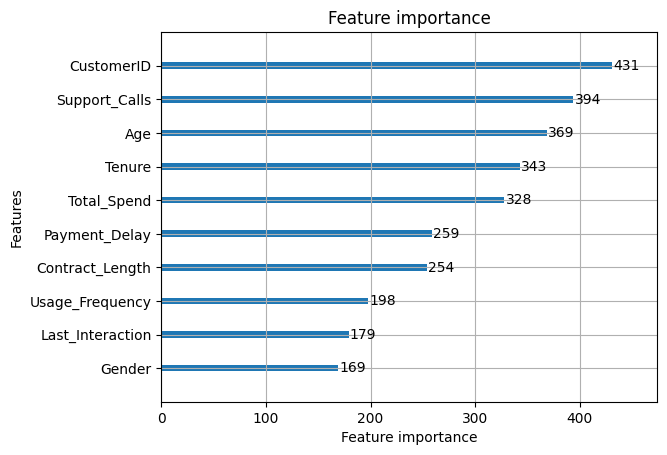

In [54]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Assuming X and y are your features and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the model
model = lgb.LGBMClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Convert probabilities to binary predictions (if needed, for classification)
# If you need probabilities: y_pred = model.predict_proba(X_test)[:, 1]
y_pred_binary = [1 if x >= 0.5 else 0 for x in y_pred]

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Accuracy: {accuracy:.2f}")

# Display a detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_binary))

# Plot feature importance
lgb.plot_importance(model, max_num_features=10)
plt.show()


In [55]:
from sklearn.metrics import roc_auc_score, roc_curve

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC AUC Score: {roc_auc:.2f}")


ROC AUC Score: 0.94


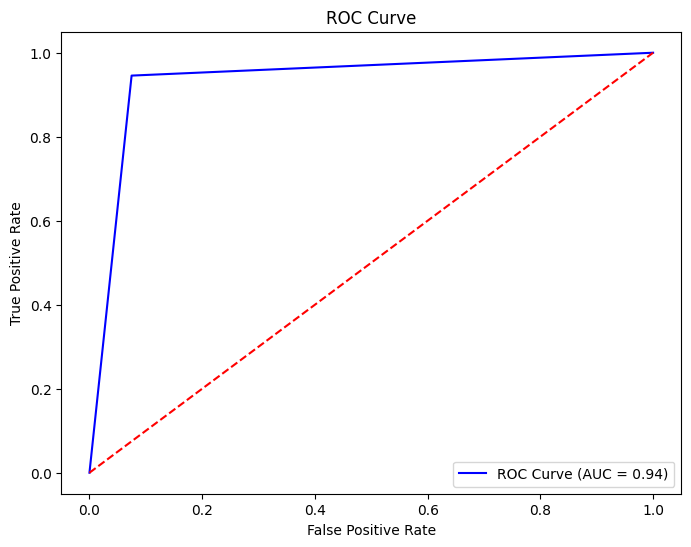

In [56]:
from sklearn.metrics import roc_curve, roc_auc_score

# Compute ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color='b')
plt.plot([0, 1], [0, 1], linestyle='--', color='r')  # Diagonal line (random guessing)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()


In [57]:
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

# Assuming combained_df is your DataFrame
# Step 1: Define features and target variable
# x = columns except churn , cluster and Frequent Support Calls
x = combained_df.drop(['Churn', 'Cluster', 'Frequent Support Calls'], axis=1)

y = combained_df['Churn']

# Step 2: Drop NaN values from both features and target
# Keep only the rows where both X and y are not NaN
X = X[y.notna()]
y = y.dropna()  # Drop NaN values from the target

# Step 3: Impute missing values in the features
imputer = SimpleImputer(strategy='mean')  # You can change the strategy if needed
X_imputed = imputer.fit_transform(X)

# Step 4: Split the cleaned dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Step 5: Use a decision stump as the weak learner
base_learner = DecisionTreeClassifier(max_depth=1)

# Create the AdaBoost classifier with 50 estimators
ada_model = AdaBoostClassifier(estimator=base_learner, n_estimators=50, learning_rate=1.0, random_state=42)

# Fit the model
ada_model.fit(X_train, y_train)



AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

In [58]:
y_pred = ada_model.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display a detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))





Accuracy: 0.93
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.90      0.92     45086
           1       0.92      0.95      0.94     55956

    accuracy                           0.93    101042
   macro avg       0.93      0.93      0.93    101042
weighted avg       0.93      0.93      0.93    101042



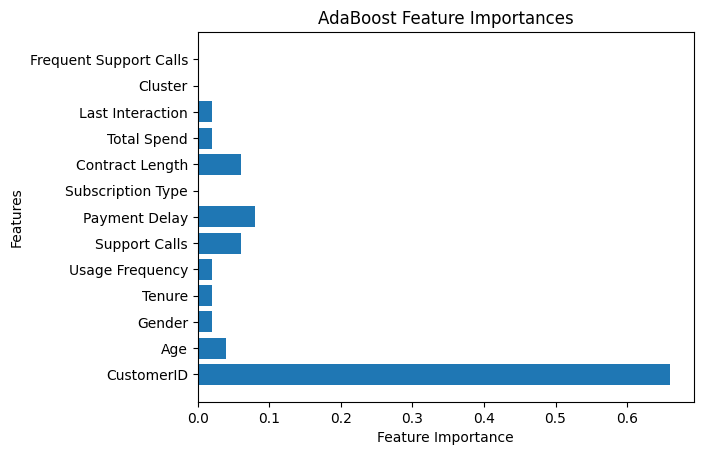

In [59]:
# Plot feature importance
feature_importance = ada_model.feature_importances_
plt.barh(X.columns, feature_importance)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("AdaBoost Feature Importances")
plt.show()

In [60]:
# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC AUC Score: {roc_auc:.2f}")

ROC AUC Score: 0.93


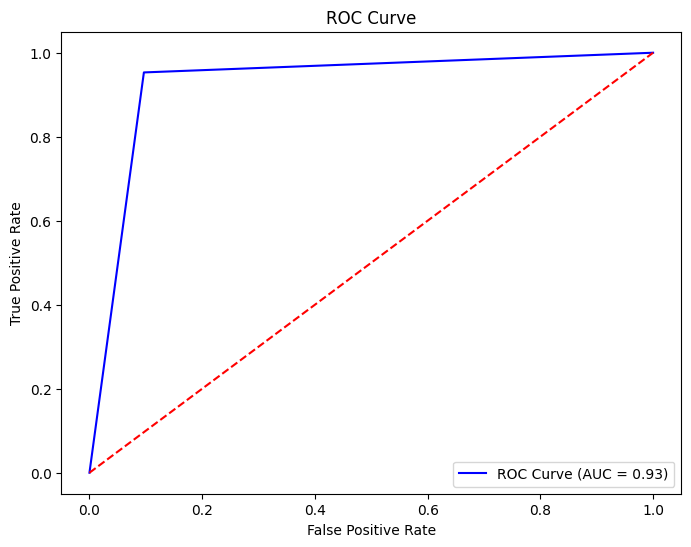

In [61]:
# Compute ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color='b')
plt.plot([0, 1], [0, 1], linestyle='--', color='r')  # Diagonal line for random guessing
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()


# **Mlops**

**Mlflow**

In [62]:
!pip install mlflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 65.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 82.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.2/233.2 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 565.6/565.6 kB 33.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.2/203.2 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.0 MB/s eta 0:00:00


In [63]:
# import mlflow
# mlflow.set_tracking_uri("http://your-tracking-server-uri")


In [ ]:
!mlflow server --backend-store-uri sqlite:///mlflow.db --default-artifact-root ./mlruns --host 0.0.0.0 --port 5000


In [ ]:
import pandas as pd
import mlflow
import mlflow.sklearn
import lightgbm as lgb
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# End any active MLflow runs
mlflow.end_run()

# Path to the CSV file
file_path = 'merged_customer_churn.csv'  # Adjust this to your actual file path

# Load the dataset
combained_df = pd.read_csv(file_path)

# Start an MLflow run
# mlflow.start_run()

try:
    # Step 1: Define features and target variable
    X = combained_df.drop('Churn', axis=1)
    y = combained_df['Churn']

    # Step 2: Drop NaN values from the target (Churn)
    X = X[y.notna()]
    y = y.dropna()  # Drop NaN values from the target

    # Step 3: Identify numeric and categorical columns
    numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns
    categorical_cols = X.select_dtypes(include=['object']).columns

    # Step 4: Create a preprocessing pipeline for numeric and categorical data
    numeric_transformer = SimpleImputer(strategy='mean')  # Impute numeric columns with mean
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute categorical columns with most frequent
        ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical columns
    ])

    # Combine both transformers into a ColumnTransformer
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_cols),
            ('cat', categorical_transformer, categorical_cols)
        ])

    # Step 5: Create a pipeline that first transforms the data and then applies the LightGBM model
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', lgb.LGBMClassifier())
    ])

    # Step 6: Split the cleaned dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Step 7: Train the model
    model.fit(X_train, y_train)

    # Step 8: Make predictions
    y_pred = model.predict(X_test)

    # Step 9: Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")

    # Display a detailed classification report
    report = classification_report(y_test, y_pred)
    print("Classification Report:")
    print(report)

    # Step 10: Log parameters, metrics, and model in MLflow
    mlflow.log_param("imputer_strategy", "mean/most_frequent")
    mlflow.log_metric("accuracy", accuracy)

    # Create an input example (using a small part of the test set)
    input_example = X_test[:5]

    # Log the model with input example in MLflow
    mlflow.sklearn.log_model(
        model,
        "lightgbm_model",
        input_example=input_example
    )

    # Log the classification report as a text artifact
    mlflow.log_text(report, "classification_report.txt")

finally:
    # End the run
    mlflow.end_run()

# Completion message
print("MLflow run completed. Check the MLflow dashboard for details.")